# ANALYSIS OF BREAST CANCER DATASET USING UNSUPERVISED LEARNING ALGORITHMS

# Libraries

In [60]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Data

In this project, we will look into Breast Cancer dataset. This dataset was otained from kaggle. According to American Cancer Society, Breast cancer is a type of cancer that starts in the breast. It can start in one or both breast. Breast cancer is commonly in women but both men and women can get it. Breast cancer occurs when some breast cells begin to grow abnormally. These cells divide themselves rapidly by forming a lump or mass. These cells may end up spread throughout the breast to the lymph nodes or other parts of the body. According to Breast Cancer organization, A tumor can be benign (not dangerous to health) or malignant (has the potential to be dangerous). Benign tumors are not considered cancerous: their cells are close to normal in appearance, they grow slowly, and they do not invade nearby tissues or spread to other parts of the body. Malignant tumors are cancerous. Left unchecked, malignant cells eventually can spread beyond the original tumor to other parts of the body.

In [4]:
#  download dataset

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
print(cancer['target_names'])

['malignant' 'benign']


In [7]:
breast_cancer_up = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
breast_cancer_up.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Also, we could import our dataset
breast_cancer = pd.read_csv('breast-cancer.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Looking at the dtype
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# looking at statistical summary
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
# replacing B and M as Benign and Malignant
breast_cancer['diagnosis'].replace('B', 'Benign',inplace=True)
breast_cancer['diagnosis'].replace('M', 'Malignant',inplace=True)

# Standardizing dataset

In [12]:
# importing standardizing library
from sklearn.preprocessing import StandardScaler

features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# Separating out the features
X = breast_cancer.loc[:, features].values

# Separating out the target
y = breast_cancer.loc[:,['diagnosis']].values

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [13]:
pd.DataFrame(data = X, columns = features).head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [14]:
X.shape

(569, 30)

In [15]:
# looking if normalized data have mean 0 and std 1.
np.mean(X),np.std(X)

(-6.826538293184326e-17, 1.0)

In [16]:
# Splitting the dataset into the 80% Training set and 20% Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Covariance Matrix

The covariance matrix is used to express the correlation between any twi or more attributes in a multidimensional dataset. Covariance matrix tells us how the two or more variables are related.

1. Positive covariance indicate that the value of one variable is diectly proportional to the other variable meaning if variable x1 increases then x2 increases as well.


2. Negative covariance indicate that the value of one variable is indirectly proportional to the other variable meaning that if x1 increases then x2 decreases.

In [17]:
mean_vec = np.mean(X, axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec))/(X.shape[0]-1)
print("Covariance Matrix", cov_mat)

Covariance Matrix [[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05192783e-01  1.19

# Eigen Decomposition on Covariance Matrix 

In [18]:
cov_mat = np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues', eig_vals)
print('Eigenfunctions', eig_vecs)

Eigenvalues [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]
Eigenfunctions [[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578e-01

In [19]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order: ')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order: 
13.304990794374566
5.701374603726136
2.822910155006231
1.9841275177301971
1.6516332423301168
1.209482239802973
0.676408881700904
0.47745625468950853
0.41762878210781695
0.35131087488173357
0.2944331534911645
0.2616211613661211
0.24178242132831396
0.15728614921759315
0.09430069560105553
0.08000340447737686
0.059503613530431855
0.05271142221014794
0.04956470021298182
0.0001332790566639787
0.0007501214127186351
0.001592136001197828
0.00691261257918449
0.008192037117607005
0.015508527134418902
0.018086793984305488
0.024383691354591085
0.027487711338904416
0.031214260553066336
0.030025663090428534


# UNSUPERVISED LEARNING

A set of statistica, tools intended for the setting in which we have only a set of features x1, x2,.....,xn measured on n observations.

This method is not intended to make predictions because there is no associated response variable. The goal is to discover interesting things about the measurement on x1, x2,....,xn

There are 2 types of Unsupervised Learning

     1. Principal Component Analysis

     2. Clustering

# 1. Principal Componet Analysis (PCA)

Tool used for data visualization / data pre-processing before supervised techniques are applied.

PCA is a dimensonality reduction technique that enables you to identify correlations and patterns in a dataset so that it can be transformed into a dataset of significantly lower dimension without loss of any important information. 

Here, I will perform Principal Component Analysis of Breast Cancer dataset in order to reduce the dimensions of the dataset and identifying correlations and patterns found in the dataset.

# PCA Projection to 2D

In [20]:
# Import PCA library
from sklearn.decomposition import PCA

# looking at PCA of 2 numbers of components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principal_breast_cancer = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principal_breast_cancer.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [21]:
print(X.shape)
print(principalComponents.shape)

(569, 30)
(569, 2)


Our original model had 30 features and has been reduced to 2 features

In [22]:
# joining PCA of 2 components dataset with response variable diagnosis
breast_cancer_pca = pd.concat([principal_breast_cancer, breast_cancer[['diagnosis']]], axis = 1)
breast_cancer_pca.head()

,principal component 1,principal component 2,diagnosis
0,9.192837,1.948583,Malignant
1,2.387802,-3.768172,Malignant
2,5.733896,-1.075174,Malignant
3,7.122953,10.275589,Malignant
4,3.935302,-1.948072,Malignant


# Visualize 2D Projection

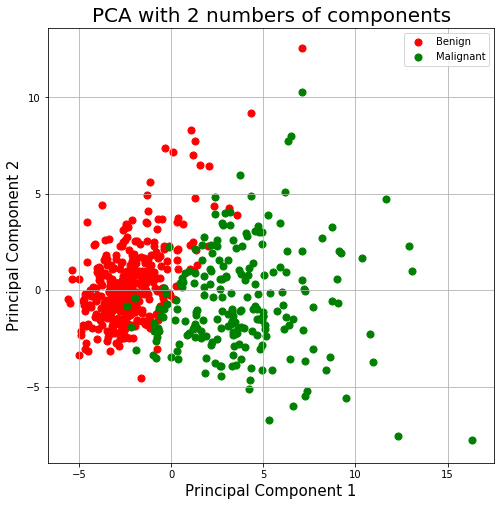

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA with 2 numbers of components', fontsize = 20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for diagnosis, color in zip(targets,colors):
    indicesToKeep = breast_cancer_pca['diagnosis'] == diagnosis
    ax.scatter(breast_cancer_pca.loc[indicesToKeep, 'principal component 1']
               , breast_cancer_pca.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [24]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

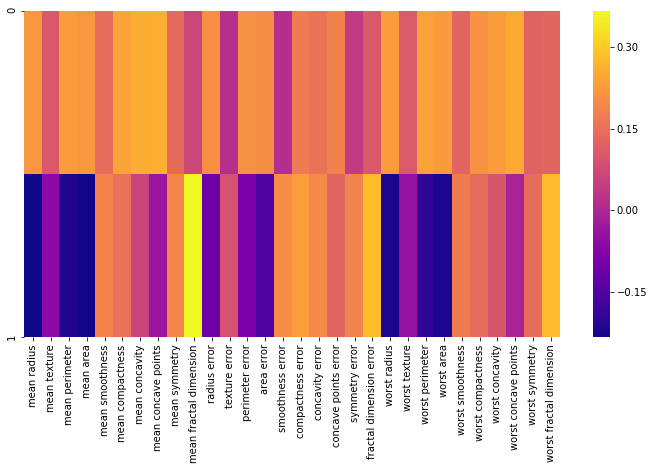

In [25]:
bc_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(bc_comp, cmap='plasma')

In [26]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.44272026, 0.18971182])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 44.27% of the variance and the second principal component contains 18.97% of the variance. Together, the two components contain 63.24% of the information.

In [27]:
# PCA with 2 number of components using train and test data
pca2 = PCA(n_components=2)
X_train = pca2.fit_transform(X_train)
X_test = pca2.transform(X_test)
principal_breast_cancer_train = pd.DataFrame(data = X_train
             , columns = ['principal component 1', 'principal component 2'])

principal_breast_cancer_test = pd.DataFrame(data = X_test
             , columns = ['principal component 1', 'principal component 2'])


principal_breast_cancer_train.head()

,principal component 1,principal component 2
0,-3.056118,1.027003
1,-2.285391,0.385059
2,-1.005956,-1.975724
3,-2.548927,0.087742
4,-2.794219,-1.032564


In [28]:
principal_breast_cancer_test.head()

,principal component 1,principal component 2
0,2.184508,2.090414
1,-2.682543,-1.699654
2,-3.056809,-2.345746
3,-2.625203,-2.581695
4,-3.651155,-1.527959


In [29]:
# joining PCA of 2 components dataset with response variable diagnosis
breast_cancer_train_pca = pd.concat([principal_breast_cancer_train, breast_cancer[['diagnosis']]], axis = 1)
breast_cancer_train_pca.head()

,principal component 1,principal component 2,diagnosis
0,-3.056118,1.027003,Malignant
1,-2.285391,0.385059,Malignant
2,-1.005956,-1.975724,Malignant
3,-2.548927,0.087742,Malignant
4,-2.794219,-1.032564,Malignant


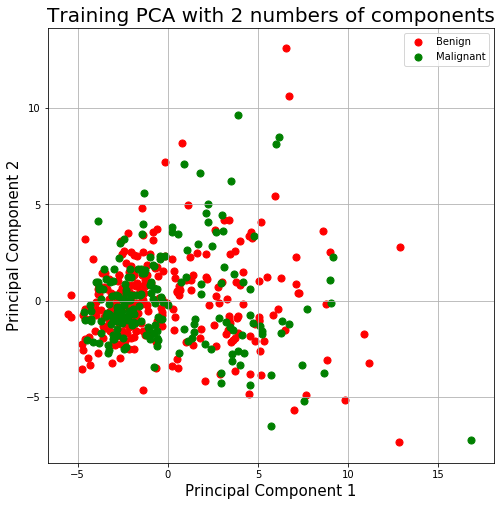

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Training PCA with 2 numbers of components', fontsize = 20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for diagnosis, color in zip(targets,colors):
    indicesToKeep = breast_cancer_train_pca['diagnosis'] == diagnosis
    ax.scatter(breast_cancer_train_pca.loc[indicesToKeep, 'principal component 1']
               , breast_cancer_train_pca.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
pca2.components_

array([[ 0.2275603 ,  0.10172784,  0.23462383,  0.23329735,  0.13420618,
         0.22833174,  0.25292689,  0.26320363,  0.12957119,  0.04948275,
         0.21680905,  0.01138334,  0.21593338,  0.21861113,  0.01215864,
         0.15696215,  0.1421183 ,  0.17044087,  0.03122791,  0.09654464,
         0.23813674,  0.10479856,  0.24413989,  0.23967811,  0.12470148,
         0.20029577,  0.21717781,  0.25138338,  0.11897365,  0.12227867],
       [-0.22042936, -0.0457063 , -0.2028638 , -0.22142493,  0.18052107,
         0.1533599 ,  0.07494316, -0.02207497,  0.19923788,  0.35289758,
        -0.10597922,  0.09793945, -0.09598936, -0.15350428,  0.19454765,
         0.24179569,  0.2249138 ,  0.14595437,  0.1826962 ,  0.28207397,
        -0.20799319, -0.0271031 , -0.19094246, -0.21171183,  0.17762742,
         0.1538714 ,  0.11555271,  0.0117205 ,  0.15805648,  0.28101929]])

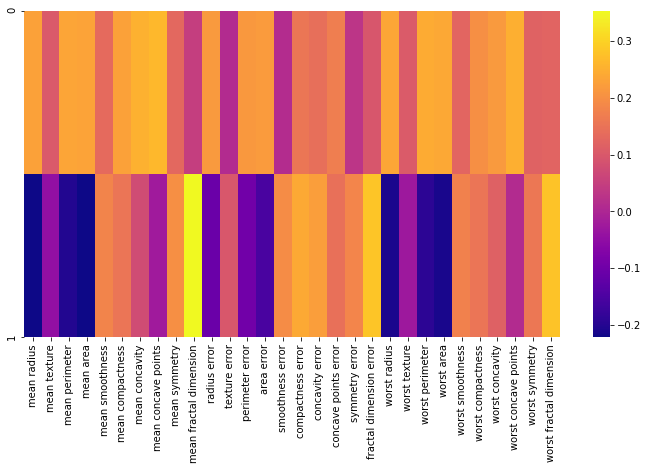

In [32]:
bc_comp2 = pd.DataFrame(pca2.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(bc_comp2, cmap='plasma')

In [33]:
explained_variance1 = pca2.explained_variance_ratio_
explained_variance1

array([0.43766898, 0.19696535])

 By using the attribute explained_variance_ratio_, you can see that the first principal component contains 43.77% of the variance and the second principal component contains 19.70% of the variance. Together, the two components contain 63.47% of the information.

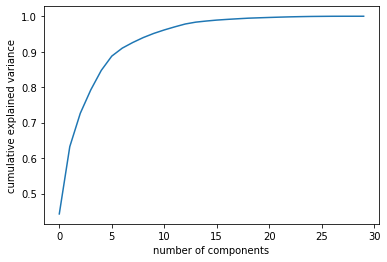

In [34]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# 2. Clustering 

A borad class of methods for discovering unknown subgroups in data. This method uses the technique of putting together things that have similar characteristics. For intance, clustering is used in customer segmentation, social network analysis, and city planning.

There are 2 types of clustering

      i. K-Means Clustering

     ii. Hierarchical Clustering 

# I. K- Means Clustering

A simple and elegant approach for partitioning a dataset into K distinct, non-overlapping clusters. We assign two or more cemtroids randomly where the Euclidean distance is used to find out which centroid is closest to each data point and the data points are assigned to the corresponding centroids. Then reposition the two or more centroids for optimization. The process is iteratively repeated until the centroids become static.

Focus on distance measure.

Elbow Method

This is used to run K-Means clustering on the dataset where k is referred as number of clusters

# K-Means Clustering Algorithm

Step 1: We randomly pick K cluster centers (centroids).

Step 2: We assign each data point to closest center which is done by calculating Eucidean distance.

Step 3: We find the new centroid by taking the average of all points assigned to that cluster.

Step 4: We repeat step 2 and 3 until none of the cluster assignment change or until our cluster remain stable.

In [35]:
 from sklearn.cluster import KMeans

In [36]:
breast_cancer['diagnosis'].replace('Benign', 0,inplace=True)
breast_cancer['diagnosis'].replace('Malignant', 1,inplace=True)

In [37]:
# importing standardizing library
from sklearn.preprocessing import StandardScaler

features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# Separating out the features
X1 = breast_cancer.loc[:, features].values

# Separating out the target
y1 = breast_cancer.loc[:,['diagnosis']].values

# Standardizing the features
X1 = StandardScaler().fit_transform(X1)

In [38]:
X1.shape

(569, 30)

In [39]:
np.mean(X1), np.std(X1)

(-6.826538293184326e-17, 1.0)

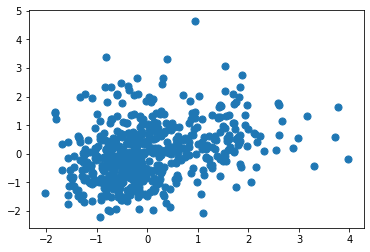

In [40]:
plt.scatter(X1[:, 0], X1[:, 1], s=50);

# Indentifying K Cluster

In [70]:
inertia = []
distortions = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X1)
    inertia.append(km.inertia_)
    distortions.append(km.inertia_)

C:\Users\vivia\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


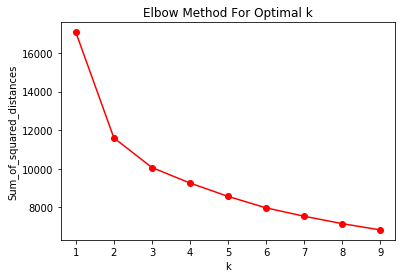

In [71]:
#Plotting the inertia result to find the elbow
plt.plot(K, inertia, 'o-', c='red')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [72]:
#finding the elbow using kneed locator
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
kl.elbow

ValueError: x and y arrays must be equal in length along interpolation axis.

In [73]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(X1)
y_kmeans = kmeans.predict(X1)

In [74]:
kmeans.labels_

array([2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [75]:
kmeans.inertia_

10061.797818243696

In [76]:
kmeans.n_iter_

12

In [77]:
kmeans.cluster_centers_

array([[-0.17232895,  0.17898672, -0.10074437, -0.22001438,  0.84922567,
         1.03543143,  0.78100563,  0.49942706,  0.75279302,  1.18398151,
        -0.08502958,  0.02340245, -0.01783062, -0.17235697,  0.43965152,
         1.07468661,  0.89050757,  0.75214074,  0.28645615,  1.0264176 ,
        -0.08822954,  0.31146754, -0.00701494, -0.15647731,  0.96915045,
         1.17977172,  1.0450547 ,  0.74299822,  0.80991644,  1.38461312],
       [-0.44809508, -0.2418554 , -0.46954224, -0.44831604, -0.358676  ,
        -0.57356749, -0.59729151, -0.59473375, -0.34211158, -0.24188587,
        -0.41793414, -0.03526589, -0.42565126, -0.38816111, -0.10019852,
        -0.44614655, -0.38279548, -0.45090772, -0.09646964, -0.32238413,
        -0.48612661, -0.25310785, -0.50571337, -0.47269217, -0.37318328,
        -0.534009  , -0.56276526, -0.59707489, -0.31763162, -0.41144444],
       [ 1.61908207,  0.62661289,  1.6240009 ,  1.66315361,  0.39856469,
         0.93061442,  1.23933718,  1.48697008,  0

In [78]:
from collections import Counter

Counter(kmeans.labels_)

Counter({2: 110, 0: 100, 1: 359})

k-means clustering has three clusters of size 112, 98, 359.

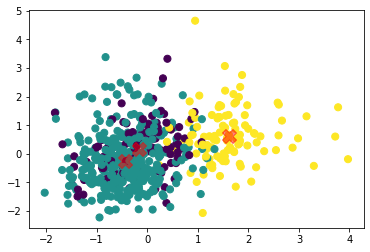

In [79]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker="X", c="r", s=200, label="centroids", alpha=0.5);

# II. Hierarchical Clustering

Result to tree based representation of the observations called a Dendrogram. Hierarchical Clustering is used to separate data into different groups based on some measure of similarity. For instance, we have cars of different types such as Ford, BMW, Toyota etc. We start to group these cars based on manufacturer. Next, we group them based on type such as sedan or suv. We can also group them by fuel types. And finally group them as cars. In general, we want to group things by using botton-up or top-down approach. 

In Hierarchical Clustering, we start by considering points of dataset on a plane. We then start by measuring distance on each point. The we find the smallest distance bewteen two data points. Then, the two datapoints merge together and are represented in a tree like structure called Dendrogram. When we are left with one cluster, we then bring them together.

In [80]:
import scipy.cluster.hierarchy as shc

In [81]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [82]:
# importing standardizing library
from sklearn.preprocessing import StandardScaler

features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# Separating out the features
X2 = breast_cancer.loc[:, features].values

# Separating out the target
y2 = breast_cancer.loc[:,['diagnosis']].values

# Standardizing the features
X2 = StandardScaler().fit_transform(X)

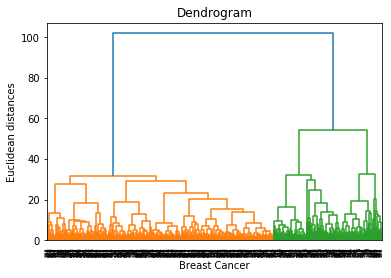

In [54]:
# plt.figure(figsize=(10,7))

dendrogram = shc.dendrogram(shc.linkage(X2, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Breast Cancer")
plt.ylabel("Euclidean distances")
plt.show()

# Generating Hierarchical Clusters

We look at the method and affinity that produce the best model results.

In [55]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
bc = cluster.fit_predict(X2)

In [56]:
from sklearn.metrics import silhouette_score

silhouette_score(X2, bc)

0.33009721062922587

In [57]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
bc = cluster.fit_predict(X2)
silhouette_score(X2, bc)

0.5450468576313827

In [58]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
bc = cluster.fit_predict(X2)
silhouette_score(X2, bc)

0.5845870685563158

In [59]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'manhattan', linkage = 'average')
bc = cluster.fit_predict(X2)
silhouette_score(X2, bc)

0.4978165402639766

We observe that the model with affinity of euclidean and method of average produce the best model with higher results.